In [30]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [31]:
!rm -rf ./out
!mkdir ./out

In [32]:
cur_dir = %pwd

In [33]:
in_files = glob.glob(os.path.join(cur_dir, "in", "*.txt"))
test_cases = [os.path.basename(f) for f in in_files]

In [34]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [35]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, "out", os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode("utf-8").strip().split("\n")[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [36]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [37]:
df = df.sort_index()

In [38]:
df.to_csv("test_res.csv")

In [39]:
df = df.iloc[:, -5:]

In [40]:
df.describe()

,2024-01-13T15:20:05.924886,2024-01-13T15:20:40.384057
count,500.000000,500.000000
mean,5661.792000,5661.792000
std,121.509365,121.509365
min,5284.000000,5284.000000
25%,5582.000000,5582.000000
50%,5668.000000,5668.000000
75%,5746.500000,5746.500000
max,5998.000000,5998.000000


In [41]:
df.iloc[:, -1].mean()

5661.792

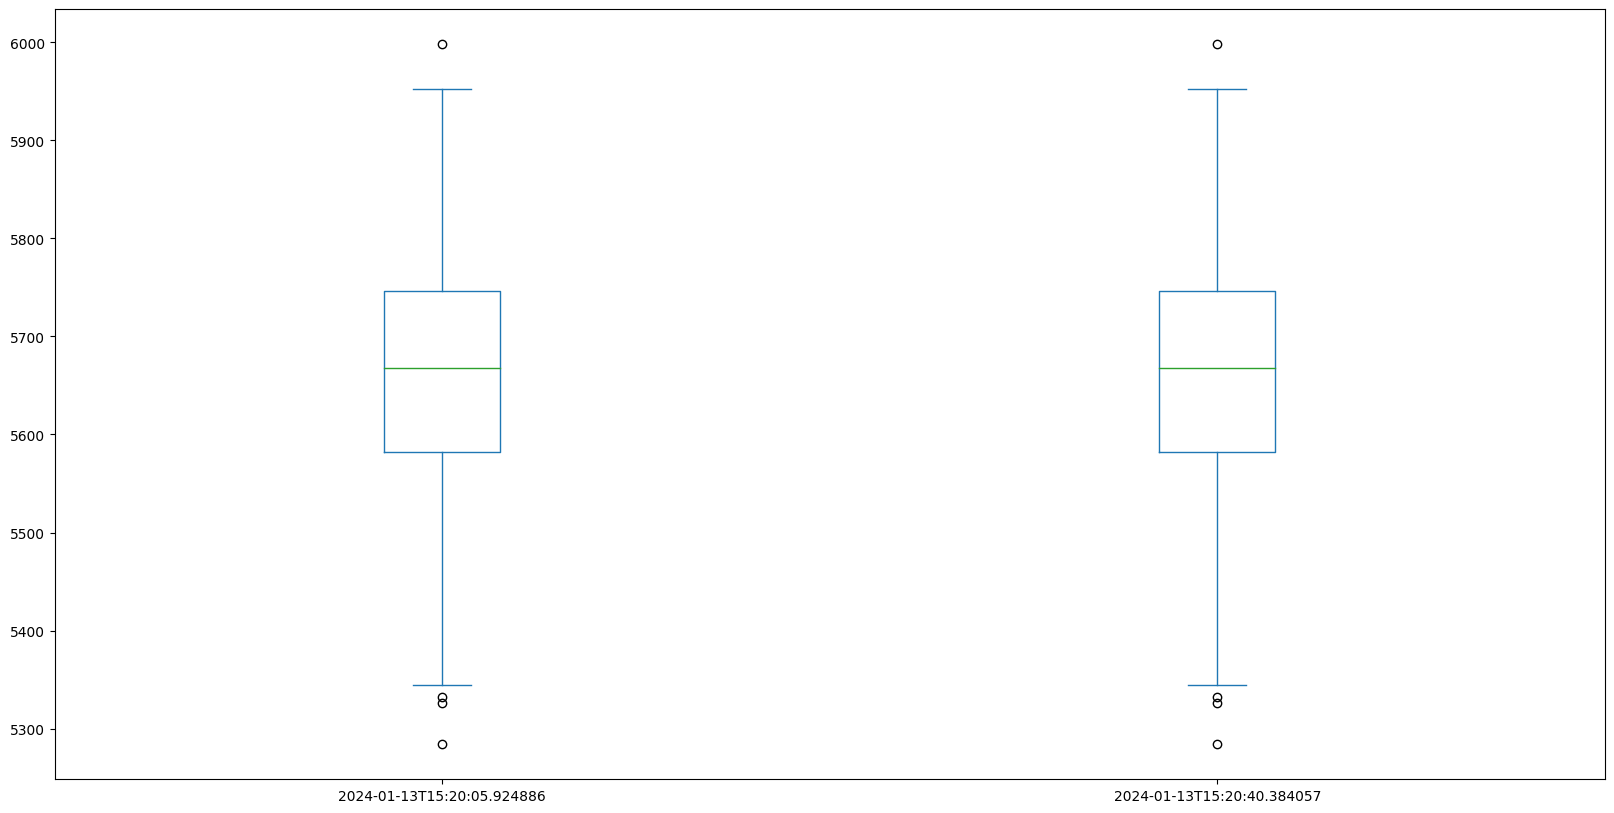

In [42]:
df.plot(kind="box", figsize=(20, 10))
plt.show()

In [43]:
df.sort_values(by=[cur_time], ascending=False)

,2024-01-13T15:20:05.924886,2024-01-13T15:20:40.384057
0301.txt,5998,5998
0093.txt,5952,5952
0140.txt,5942,5942
0095.txt,5920,5920
0425.txt,5920,5920
...,...,...
0371.txt,5360,5360
0010.txt,5344,5344
0123.txt,5332,5332
0082.txt,5326,5326


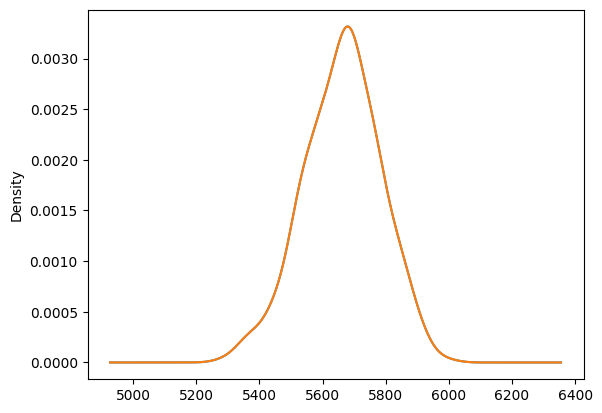

In [44]:
# bins = np.linspace(0, 10, 40)
last_sel = df.iloc[:, -1]
last_sel.plot.kde()
last2_sel = df.iloc[:, -2]
last2_sel.plot.kde()
plt.show()

In [45]:
last_df = df.iloc[:, -1]
wins = df.sub(last_df, axis=0)<0
loses = df.sub(last_df, axis=0)>0
win_cnt = wins.sum(axis=0)
lose_cnt = loses.sum(axis=0)
(win_cnt - lose_cnt).sort_index(ascending=False)

2024-01-13T15:20:40.384057    0
2024-01-13T15:20:05.924886    0
dtype: int64